In [1]:
import sys; sys.path.append('..')
from hashdict.etc.performance import *
profiler = HashDictProfiler()

In [2]:
profile_kwargs = dict(
    size=[1, 10, 100, 1_000, 10_000, 100_000, 1_000_000],
    # size = [1024],
    # num_proc = [1,2,3,4,5,6,7,8,9,10],
    num_proc=[1,2,4,8],
    iterations = 100,
    compress=[True],
    b64=[True],
    profile_by=('engine',),
    # engine=['diskcache']
    engine = ('memory', 'file', 'sqlite', 'redis', 'diskcache', 'shelve')
    # engine = ('pickledb', )
)
profile_kwargs

{'size': [1, 10, 100, 1000, 10000, 100000, 1000000],
 'num_proc': [1, 2, 4, 8],
 'iterations': 100,
 'compress': [True],
 'b64': [True],
 'profile_by': ('engine',),
 'engine': ('memory', 'file', 'sqlite', 'redis', 'diskcache', 'shelve')}

In [3]:
df = profiler.profile_df(**profile_kwargs)
df

Processing 1x ({'engine': 'file'}):   0%|          | 0/100 [00:00<?, ?it/s]

Processing 4x ({'engine': 'file'}):  31%|███       | 31/100 [00:01<00:01, 41.16it/s]

In [4]:
def plot(
    df,
    x="write_total_size",
    y="write_total_time",
    shape=None,
    color="Engine",
    facet=None,
    group_by=["Engine", "write_num_bin", "Num Processes"],
):
    p9.options.figure_size = 9, 6
    df = df.reset_index()
    df['write_num_bin'] = df['write_num'] // 10 * 10
    figdf = df.groupby(group_by).mean(numeric_only=True).reset_index()
    # return figdf.sample(frac=1)
    fig = p9.ggplot(
        figdf,
        p9.aes(
            x=x,
            y=y,
            # shape=shape,
            color=color,
            # size='write_num'
        ),
    )
    fig += p9.geom_line(alpha=0.5, size=2)
    fig += p9.geom_point(alpha=0.5)
    # fig += p9.geom_smooth()
    engine_order = figdf.groupby("Engine")[y].mean().sort_values(ascending=False).index
    figdf["Engine"] = pd.Categorical(figdf["Engine"], categories=engine_order)
    if facet:
        fig += p9.facet_wrap(facet, nrow=1)
    # fig += p9.facet_grid('Num Processes~Size (B)')
    # fig += p9.scale_x_log10()
    # fig += p9.scale_y_log10()
    fig += p9.theme_classic()
    # fig += p9.scale_size_continuous(range=(1,5))
    return fig


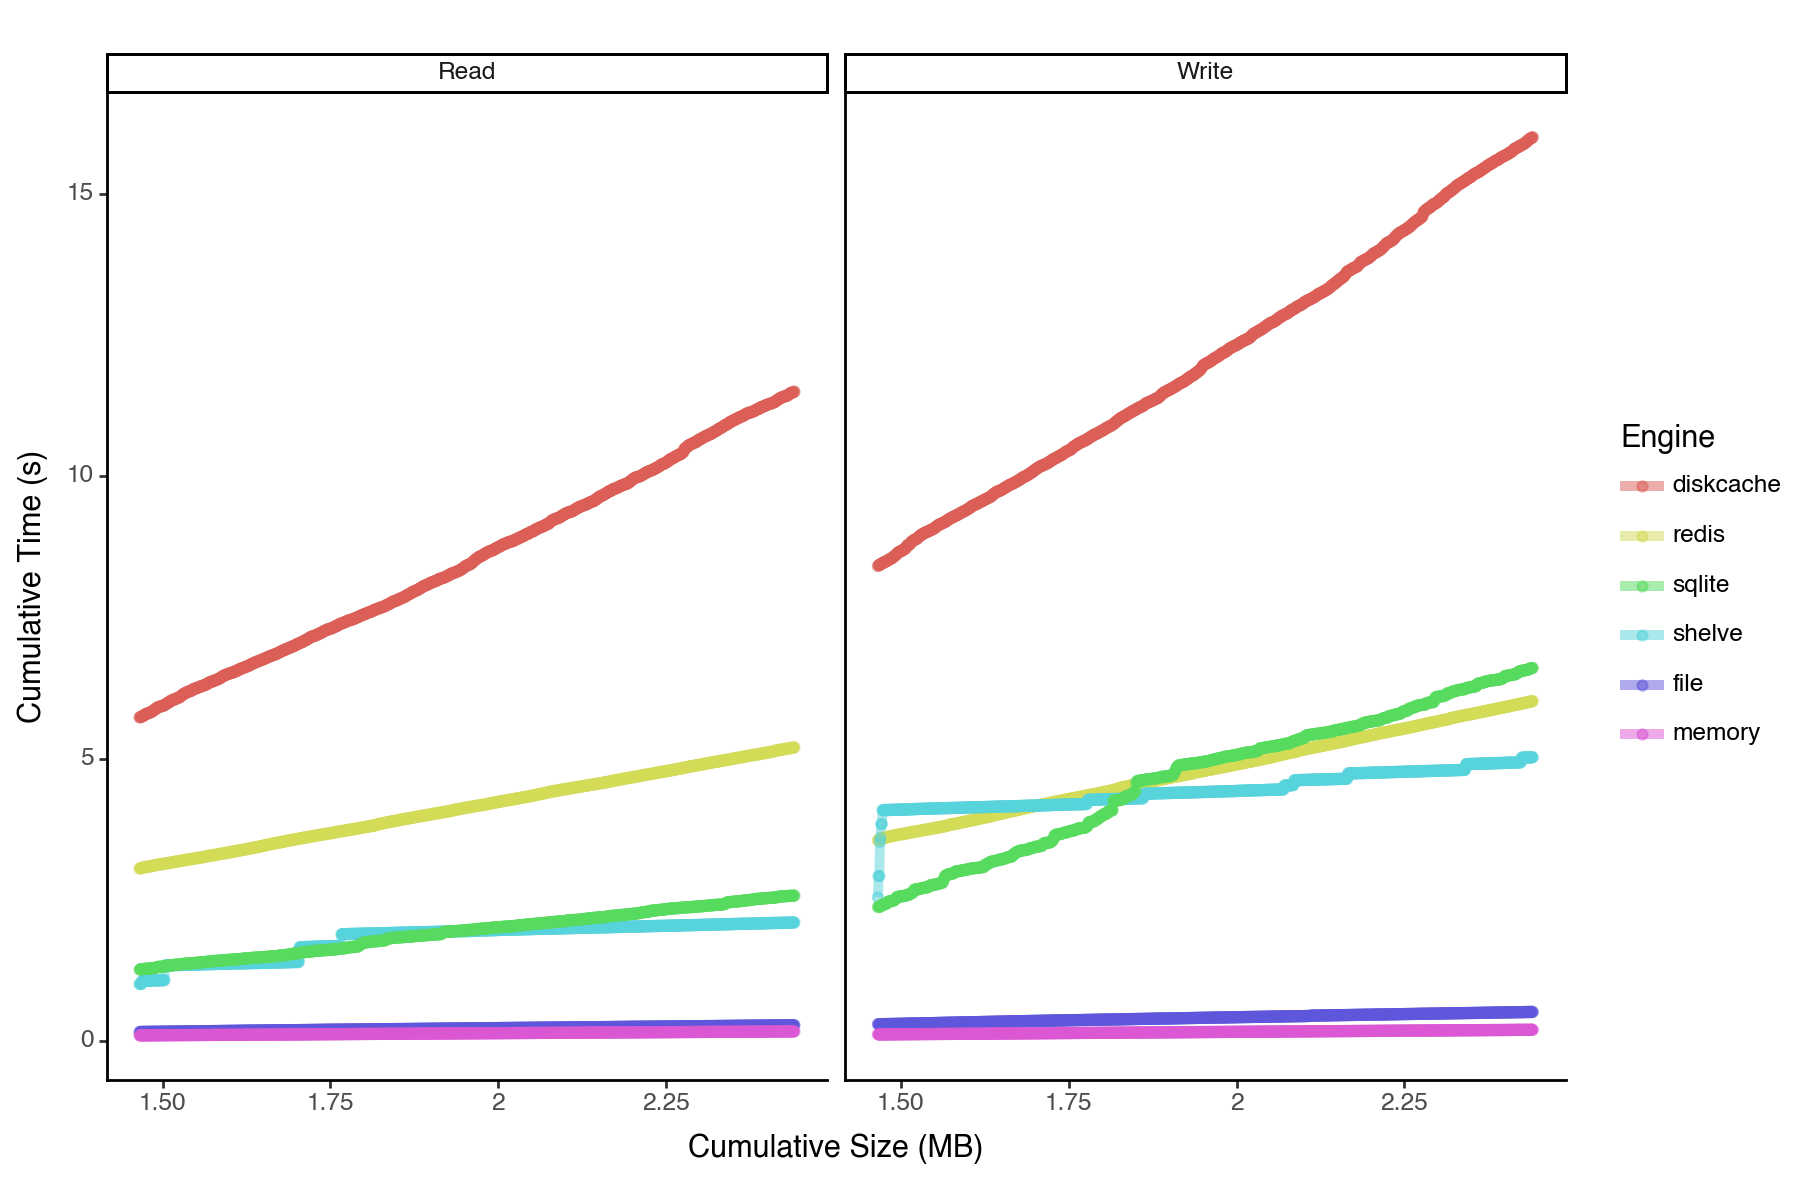

<Figure Size: (900 x 600)>

In [5]:
plot(df, 
     x='Cumulative Size (MB)', 
     y='Cumulative Time (s)', 
     group_by=["Engine", "write_num", "Operation"],
     color='Engine',
     facet='Operation'
)#.query('Engine=="memory"').sort_values('Speed (MB/s)')

In [ ]:
# # !pip install -U pip wheel
# # !pip install scikit-misc
# # You can then use this method in your plotting function
# def plot_speed(self, y='Speed (MB/s)'):
#     import plotnine as p9
#     p9.options.figure_size = 9, 6
#     kwargs={**profile_kwargs, 'num_proc':10}
#     figdf = self.profile_df(group_by=['Engine', 'Encoding', 'Method', 'Num Processes', 'Speed Type'], by_speed=True, **kwargs).reset_index()
#     figdf = figdf.sort_values('Num Processes')
#     fig = p9.ggplot(figdf, p9.aes(x='Num Processes', y=y, size='Rate (it/s)',
#                                   color='Encoding'))
#     # fig += p9.geom_line(alpha=.5, size=2)
#     fig += p9.geom_point(alpha=.5)
#     fig += p9.geom_smooth()
#     engine_order = figdf.groupby('Engine')[y].mean().sort_values(ascending=False).index
#     figdf['Engine'] = pd.Categorical(figdf['Engine'], categories=engine_order)
#     # fig += p9.facet_wrap('Engine',nrow=1)
#     fig += p9.facet_grid('Speed Type~Engine', scales='free_y')
#     # fig += p9.scale_y_log10()
#     fig += p9.theme_classic()
#     return fig

# # profile_df_reshaped(profiler)
# # To use the new plot:
# plot_speed(profiler)

In [ ]:
# # !pip install plotnine
# def plot_by_num_proc(self, y='Speed (MB/s)'):
#     import plotnine as p9
#     p9.options.figure_size=9,9
#     figdf = profile_reshaped(self)
#     figdf = figdf.groupby('Num Processes']).mean(numeric_only=True).reset_index()
#     return figdf
#     fig = p9.ggplot(figdf, p9.aes(x='Num Processes', y=y, color='Encoding', shape='Speed Type', label='Method'))
#     fig += p9.geom_line(alpha=.25, size=1)
#     fig += p9.geom_point(alpha=.25, size=5)

#     engine_order = figdf.groupby('Engine')[y].mean().sort_values(ascending=False).index
#     figdf['Engine'] = pd.Categorical(figdf['Engine'], categories=engine_order)
#     fig += p9.facet_wrap('Engine',nrow=1)
#     fig += p9.scale_x_log10()
#     fig += p9.scale_y_log10()
#     # fig += p9.geom_text(size=12)
#     fig += p9.theme_minimal()
#     return fig



# plot_by_num_proc(profiler)

In [ ]:
# # !pip install plotnine
# import plotnine as p9
# p9.options.figure_size=9,9
# figdf = df.reset_index()
# fig = p9.ggplot(figdf, p9.aes(x='Read Speed (MB/s)', y='Write Speed (MB/s)', color='Engine', shape='Encoding', label='Method'))
# fig += p9.geom_point(alpha=.25, size=5)
# # fig += p9.scale_x_log10()
# # fig += p9.scale_y_log10()
# # fig += p9.geom_text(size=12)
# fig += p9.theme_minimal()
# fig

In [ ]:
# # !pip install plotnine
# import plotnine as p9
# p9.options.figure_size=9,9
# figdf = df.reset_index()
# fig = p9.ggplot(figdf, p9.aes(x='Read Rate (it/s)', y='Write Rate (it/s)', color='Encoding', shape='Engine', label='Method'))
# fig += p9.geom_point(alpha=.25, size=5)
# fig += p9.scale_x_log10()
# fig += p9.scale_y_log10()
# # fig += p9.geom_text(size=12)
# fig += p9.theme_minimal()
# fig